In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("diabetes.csv")
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'diabetes.csv'

In [4]:
# Step 2 - Load the dataset
data = pd.read_csv("diabetes.csv")

# Show the first 5 rows
data.head()



FileNotFoundError: [Errno 2] No such file or directory: 'diabetes.csv'

In [5]:
data = pd.read_csv("data/diabetes.csv")
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/diabetes.csv'

In [6]:
data = pd.read_csv("C:/Users/sangmesh/OneDrive/Desktop/HealthRiskPrediction/data/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Step 3 - Explore the dataset
# Show number of rows and columns
print("Shape of data:", data.shape)

# Show column names
print("\nColumn names:")
print(data.columns)

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Get basic statistical details
print("\nStatistical Summary:")
print(data.describe())


Shape of data: (768, 9)

Column names:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Statistical Summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  11

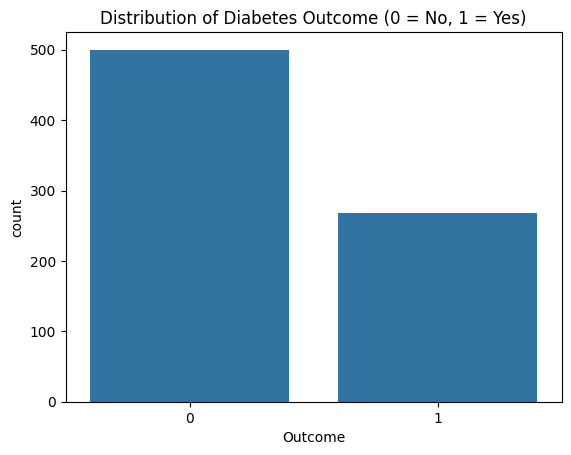

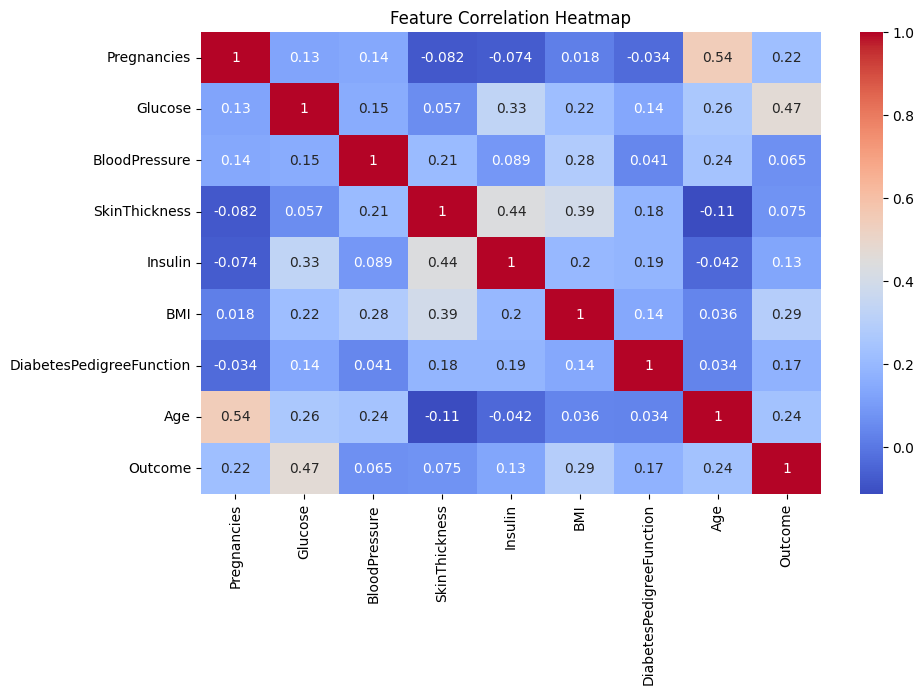

In [8]:
# Step 4 - Data Visualization

# 1️⃣ Check class distribution
sns.countplot(x='Outcome', data=data)
plt.title("Distribution of Diabetes Outcome (0 = No, 1 = Yes)")
plt.show()

# 2️⃣ Check correlation between features
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
# Step 5 - Train a Machine Learning Model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1️⃣ Separate features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# 2️⃣ Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ Create and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 4️⃣ Make predictions
y_pred = model.predict(X_test)

# 5️⃣ Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.7272727272727273

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79        99
           1       0.61      0.64      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [10]:
# Step 6 - Save the trained model
import joblib

# Save the trained model as a file
joblib.dump(model, "diabetes_model.pkl")

print("✅ Model saved successfully as diabetes_model.pkl")


✅ Model saved successfully as diabetes_model.pkl


In [11]:
# Step 7 - Test the model with a new patient's data

# Example input data [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
new_data = [[2, 120, 70, 20, 85, 25.0, 0.351, 30]]

# Predict
prediction = model.predict(new_data)

if prediction[0] == 1:
    print("🩸 The patient is likely to have Diabetes.")
else:
    print("✅ The patient is not likely to have Diabetes.")


✅ The patient is not likely to have Diabetes.


C:\Users\sangmesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
